##1.-Carga datos Airbnb

### 1.1-Carga Fichero Airbnb.csv

In [1]:
# nos descargamos el dataset de OpenDataSoft
!wget -O "airbnb-listings.csv" "https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B"

--2020-07-19 09:16:54--  https://public.opendatasoft.com/explore/dataset/airbnb-listings/download/?format=csv&disjunctive.host_verifications=true&disjunctive.amenities=true&disjunctive.features=true&refine.country=Spain&q=Madrid&timezone=Europe/London&use_labels_for_header=true&csv_separator=%3B
Resolving public.opendatasoft.com (public.opendatasoft.com)... 34.248.20.69, 34.249.199.226
Connecting to public.opendatasoft.com (public.opendatasoft.com)|34.248.20.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/csv]
Saving to: ‘airbnb-listings.csv’

airbnb-listings.csv     [           <=>      ]  54.19M  2.74MB/s    in 31s     

2020-07-19 09:17:29 (1.73 MB/s) - ‘airbnb-listings.csv’ saved [56826824]



Vemos el fichero descargado

In [2]:
!ls -lah

total 55M
drwxr-xr-x 1 root root 4.0K Jul 19 09:16 .
drwxr-xr-x 1 root root 4.0K Jul 19 09:12 ..
-rw-r--r-- 1 root root  55M Jul 19 09:17 airbnb-listings.csv
drwxr-xr-x 1 root root 4.0K Jul 15 16:11 .config
drwxr-xr-x 1 root root 4.0K Jul 10 16:29 sample_data


In [3]:
# Leemos el dataset con pandas y mostramos los 5 primeros registros
import pandas as pd
data = pd.read_csv('airbnb-listings.csv', sep = ';')
data.head(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (40) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


ID  ...                                           Features
0  12768616  ...  Host Has Profile Pic,Host Identity Verified,Is...
1   1629146  ...  Host Has Profile Pic,Host Identity Verified,Re...
2   4539828  ...  Host Has Profile Pic,Host Identity Verified,Is...
3  15698134  ...  Host Has Profile Pic,Host Identity Verified,Is...
4  15447205  ...  Host Has Profile Pic,Host Identity Verified,Is...

[5 rows x 89 columns]

Vemos el número de registros y columnas que tiene el dataset

In [4]:
data.shape

(14001, 89)

In [5]:
# ¿De qué variables disponemos?
data.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

### 1.2- Carga Fichero Imagenes

Cargamos las imagenes en 1 array

In [6]:
 # aquí creamos nuestra estructura de datos, que va a consistir en la url de la
# imagen y un índice para saber donde insertarla en nuestro array
images_paths = [[i, img_url] for i, img_url in enumerate(data['Thumbnail Url'])]

In [7]:
 # vamos a ver cómo ha quedado
images_paths[:5]

[[0,
  'https://a0.muscache.com/im/pictures/cffe393a-0d84-4fd5-ab4c-a62e067c1b0d.jpg?aki_policy=small'],
 [1,
  'https://a0.muscache.com/im/pictures/ea919e56-aa99-4d5d-a129-1edf0d117d6a.jpg?aki_policy=small'],
 [2,
  'https://a0.muscache.com/im/pictures/57011236/eea5c213_original.jpg?aki_policy=small'],
 [3,
  'https://a0.muscache.com/im/pictures/974f0245-55c2-4e8c-b9bf-14c1c975c798.jpg?aki_policy=small'],
 [4,
  'https://a0.muscache.com/im/pictures/c2dde263-20dd-43af-8c6b-be636c2c0ce1.jpg?aki_policy=small']]

In [8]:
import imageio as io
import cv2

# esta es la función que se descargará la imagen y devolverá la imagen y el 
# índice indicando la posición donde se incrustará la imagen en nuestro array
def get_image(data_url, target_size=(224, 224)):
    idx, url = data_url
    try:
        img = io.imread(url)
        # hay alguna imagen en blanco y negro y daría error al incluirla en 
        # nuestro array de imagenes que tiene 3 canales, así que convertimos
        # todas las imágenes que tengan menos de 3 dimensiones a color
        if img.ndim < 3:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = cv2.resize(img, dsize=target_size)
        return img, idx
    except IOError as err:
        return (None, idx)

In [9]:
import numpy as np

# en este array iremos incrustando las imágenes conforme las vayamos obteniendo
loaded_images = np.zeros((len(images_paths), 224, 224, 3), dtype=np.uint8)

# y en este array llevaremos un control de cuales se han cargado correctamente
# y cuales no
was_loaded = np.zeros(len(images_paths))

Descargamos las imagenes, las dejaremos en el dataset loaded_images, para ser utilizado en la parte de modelos convolucionales

In [10]:
print(loaded_images.shape)

(14001, 224, 224, 3)


In [11]:
import concurrent
from tqdm import tqdm

# creamos un pool de procesos que se irán descargando las imágenes
# por defecto, se crearán tantos como CPUs tenga vuestra máquina
with concurrent.futures.ProcessPoolExecutor() as executor:
    # procesamos la lista de urls de imágenes paralelizandola con el pool de procesos
    for (img, idx) in tqdm(executor.map(get_image, images_paths), total=len(images_paths)):
        # metemos la imagen en nuestro array
        if img is not None:
            loaded_images[idx] = img
            was_loaded[idx] = 1
        else:
            was_loaded[idx] = 0

print('Terminado!')
print(f'Total de imágenes recuperadas correctamente: {sum(was_loaded)}/{len(images_paths)}')

100%|██████████| 14001/14001 [15:51<00:00, 14.71it/s]


Terminado!
Total de imágenes recuperadas correctamente: 11271.0/14001


In [12]:
 # guardamos las imágenes
np.save('images.npy', loaded_images)
np.save('was_loaded.npy', was_loaded)

In [13]:
loaded_images_backup=loaded_images

In [14]:
# montamos GDrive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [15]:
 # almacenamos las imagenes en nuestro drive
!cp images.npy /content/drive/My\ Drive/images.npy
!cp was_loaded.npy /content/drive/My\ Drive/was_loaded.npy

In [16]:
!ls -lah images.npy was_loaded.npy

-rw-r--r-- 1 root root 2.0G Jul 19 07:45 images.npy
-rw-r--r-- 1 root root 110K Jul 19 07:45 was_loaded.npy


Obtenemos el shape del dataset csv:


In [16]:
data.shape

(14001, 89)

Nos quedamos con los datos para los que se ha cargado correctamente la imagen:

In [17]:
data_with_imgs = data[was_loaded == 1]
data_with_imgs.shape
data_with_imgs.reset_index(inplace=True)

#2.-Análisis Exploratorio de los datos

La variable precio realmente la tenemos que extraer antes de escalar, una vez que realizamos el filtrado de los registros

In [18]:
# seleccionamos la que será nuestra etiqueta. Esta etiqueta la cogeremos cuando hayamos filtrado todos los registros
y_reg = data_with_imgs['Price']

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


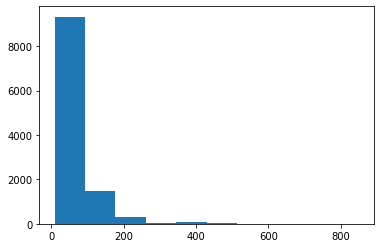

In [19]:
# y un rango para clasificación (del 1 al 3 por ejemplo: barato, normal, caro)
import matplotlib.pyplot as plt
plt.hist(y_reg, bins=10)
plt.show()

In [20]:
 y_class = []
for x in y_reg:
    # barato
    if x <= 50:
        y_class.append(0)
    elif x <=150:
        y_class.append(1)
    else:
        y_class.append(2)

In [21]:
 # veamos cómo ha quedado la distribución al convertirla a 3 clases
plt.hist(y_class, bins=3)
plt.show()

Vamos a realizar el filtrado por ciudad para quedarnos sólo con Madrid, ya que en su mayoría pertenecen a la ciudad de Madrid.

In [22]:
#Vamos a explorar las ciudades, y diferentes variables para centrar el objetivo del modelo

In [23]:
data_with_imgs.City.value_counts()

Madrid                             10711
Barcelona                            264
马德里                                   51
Palma                                 40
Madrid, Comunidad de Madrid, ES       18
                                   ...  
las matas  madrid                      1
Portals Nous                           1
Ventas                                 1
Peguera, Calvià                        1
Felanitx                               1
Name: City, Length: 98, dtype: int64

In [24]:
data_with_imgs_Mad = data_with_imgs[data_with_imgs.City == 'Madrid']
data_with_imgs_Mad.shape

(10711, 90)

In [25]:
loaded_images.shape

(14001, 224, 224, 3)

Ya tenemos los datos filtrados del csv que son 10.703 registros y por otro lado los datos de imagenes que son 11268 imagenes

## 2.1-Separación Train y Test

A partir de ahora los datos sobre los que se realizará el análisis exploratorio serán los de train exclusivamente

In [26]:
from sklearn.model_selection import train_test_split

# Vamos a dividir en train y test. A lo largo del analisis exploratorio, sólo se va a utilizar el dato de train.
# Los datos de validación se van a obtener antes de crear y testear el modelo, en cuyo paso se dividira el dato de train en train y validacion

#X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

train, test = train_test_split(data_with_imgs_Mad, test_size=0.2, shuffle=True, random_state=0)
print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')
#train.to_csv('./train.csv', sep=';', decimal='.', index=False)
#test.to_csv('./test.csv', sep=';', decimal='.', index=False)

Dimensiones del dataset de training: (8568, 90)
Dimensiones del dataset de test: (2143, 90)


## 2.2- Preprocesado de datos

En este apartado, se va a seleccionar las variables a incluir en el modelo. Nos basamos en datos de train exclusivamente para evitar data leakage. La primera preselección de variables se realiza por nombre, quitando variables como IDs que obviamente no van a tener ningún efecto sobre el precio

In [27]:
#Seleccionamos el primer conjunto de variables. Esta es la misma selección de variables que se hizo para la práctica de ML, variables que por nombre no
#tienen que ver con la predicción de precio.

variables_selec= ["Neighbourhood","Neighbourhood Cleansed","Neighbourhood Group Cleansed","Zipcode","Property Type","Room Type",
               "Accommodates","Bathrooms","Bedrooms","Beds","Bed Type","Amenities","Square Feet","Price","Weekly Price",
               "Monthly Price","Security Deposit","Cleaning Fee","Guests Included","Extra People","Minimum Nights",
               "Maximum Nights","Number of Reviews","Review Scores Rating","Review Scores Accuracy",
               "Review Scores Cleanliness","Review Scores Checkin","Review Scores Communication","Review Scores Location",
               "Review Scores Value","Cancellation Policy","Reviews per Month"]

train_1=train.loc[:,variables_selec]
train_1.shape

(8568, 32)

### 2.2.1- Analizamos NAs

In [28]:
train_1.isna().sum()

Neighbourhood                   2975
Neighbourhood Cleansed             0
Neighbourhood Group Cleansed       0
Zipcode                          296
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         28
Bedrooms                          14
Beds                              26
Bed Type                           0
Amenities                         60
Square Feet                     8268
Price                              3
Weekly Price                    6519
Monthly Price                   6586
Security Deposit                5027
Cleaning Fee                    3528
Guests Included                    0
Extra People                       0
Minimum Nights                     0
Maximum Nights                     0
Number of Reviews                  0
Review Scores Rating            1788
Review Scores Accuracy          1798
Review Scores Cleanliness       1795
Review Scores Checkin           1805
R

En el próximo paso vamos a tratar todos estos nulos, tanto eliminando columnas como rellenando el valor de las variables

---



### 2.2.2- Limpieza variables

A continuación, vamos a analizar las variables tanto numéricas cómo categóricas. La idea es preprocesar la información para evitar nulos, variables que no nos puedan servir, correlacionadas etc.

In [29]:
#Tenemos que normalizar y estandarizar los datos, tanto variables numericas como categoricas. Dependiendo de que tipo de solución sea: regresión/clasificación
#la variable target será numérica o se transformará a categorica.

#Vamos a tener 2 tipos de variables principales: numéricas y categóricas. Tenemos que tratar y normalizar ambas por separado.

#En primer lugar analizamos las variables

train_1.describe()

Accommodates    Bathrooms  ...  Review Scores Value  Reviews per Month
count   8568.000000  8540.000000  ...          6762.000000        6847.000000
mean       3.090920     1.257319  ...             9.272257           2.154278
std        1.975636     0.611910  ...             0.902410           1.962444
min        1.000000     0.000000  ...             2.000000           0.020000
25%        2.000000     1.000000  ...             9.000000           0.610000
50%        2.000000     1.000000  ...             9.000000           1.570000
75%        4.000000     1.000000  ...            10.000000           3.210000
max       16.000000     8.000000  ...            10.000000          17.210000

[8 rows x 23 columns]

In [30]:
#La variable price tiene 7 registros sin informar. Los eliminamos
train_1.dropna(subset=['Price'],inplace=True)

# Las variables principales cómo bathrooms, bedrooms o beds tienen algun nulo. Teniendo en cuenta que los valores nulos 
#son tan pequeños. Vamos a eliminar esos registros.

train_1.dropna(subset=['Bathrooms'],inplace=True)
train_1.dropna(subset=['Bedrooms'],inplace=True)
train_1.dropna(subset=['Beds'],inplace=True)

#-Teniendo en cuenta el alto % de nulos que tienen se eliminan estas variables:
#-Square Feet, Weekly price y monthly price, Security Deposiy y cleaning Fee
    
train_1.drop(['Square Feet','Weekly Price','Monthly Price'],axis=1,inplace=True)    

#Respecto a las variables del dataset relativas a barrios, vamos a quedarnos con sólo 1 de ellas. En este caso con: **Neighbourhood Group Cleansed**
train_1.drop(['Neighbourhood','Neighbourhood Cleansed','Zipcode'],axis=1,inplace=True)  

#La variable amenities, es una variable que contiene texto y no se va a aplicar para este módulo la extraccón de conocimiento a través de ella por lo que la eliminamos
train_1.drop(['Amenities'],axis=1,inplace=True) 


train_1.describe()



Accommodates    Bathrooms  ...  Review Scores Value  Reviews per Month
count   8517.000000  8517.000000  ...          6733.000000        6817.000000
mean       3.093812     1.255665  ...             9.274469           2.157574
std        1.973939     0.603734  ...             0.898006           1.962289
min        1.000000     0.000000  ...             2.000000           0.020000
25%        2.000000     1.000000  ...             9.000000           0.610000
50%        2.000000     1.000000  ...             9.000000           1.580000
75%        4.000000     1.000000  ...            10.000000           3.210000
max       16.000000     8.000000  ...            10.000000          17.210000

[8 rows x 20 columns]

In [31]:
#-En las variables Security Deposit y Cleaning Fee, vamos a tener en cuenta que el nulo equivale a 0, cómo que no tiene
#ni tarifa de limpieza ni deposito de seguridad.
#Aplicamos el fill rellenando con 0s.

train_1['Security Deposit'].fillna(0, inplace=True)
train_1['Cleaning Fee'].fillna(0, inplace=True)
train_1['Review Scores Rating'].fillna(0, inplace=True)
train_1.describe()

Accommodates    Bathrooms  ...  Review Scores Value  Reviews per Month
count   8517.000000  8517.000000  ...          6733.000000        6817.000000
mean       3.093812     1.255665  ...             9.274469           2.157574
std        1.973939     0.603734  ...             0.898006           1.962289
min        1.000000     0.000000  ...             2.000000           0.020000
25%        2.000000     1.000000  ...             9.000000           0.610000
50%        2.000000     1.000000  ...             9.000000           1.580000
75%        4.000000     1.000000  ...            10.000000           3.210000
max       16.000000     8.000000  ...            10.000000          17.210000

[8 rows x 20 columns]

Se puede ver que gran parte de las variables relativas a reviews están correlacionadas. Vamos a optar por quedarnos con **Review Scores Rating** de todas ellas.

In [32]:
train_1.drop(["Number of Reviews","Review Scores Accuracy", 'Review Scores Cleanliness','Review Scores Cleanliness',
                           'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value',
                           'Reviews per Month'],axis=1,inplace=True) 
train_1.describe()

Accommodates    Bathrooms  ...  Maximum Nights  Review Scores Rating
count   8517.000000  8517.000000  ...     8517.000000           8517.000000
mean       3.093812     1.255665  ...     1005.856170             73.067629
std        1.973939     0.603734  ...    11056.229656             38.102065
min        1.000000     0.000000  ...        1.000000              0.000000
25%        2.000000     1.000000  ...      360.000000             80.000000
50%        2.000000     1.000000  ...     1125.000000             92.000000
75%        4.000000     1.000000  ...     1125.000000             97.000000
max       16.000000     8.000000  ...  1000000.000000            100.000000

[8 rows x 12 columns]

### 2.2.3- Correlación entre variables

Analizamos las correlaciones entre variables, ya que hay multiples variales sobre rating que es muy probable que estén correlacionadas y no es necesario meter todas al modelo. En este caso, y viendo que tenían un % alto de nulos hemos decidido quitarlos para esta práctica

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


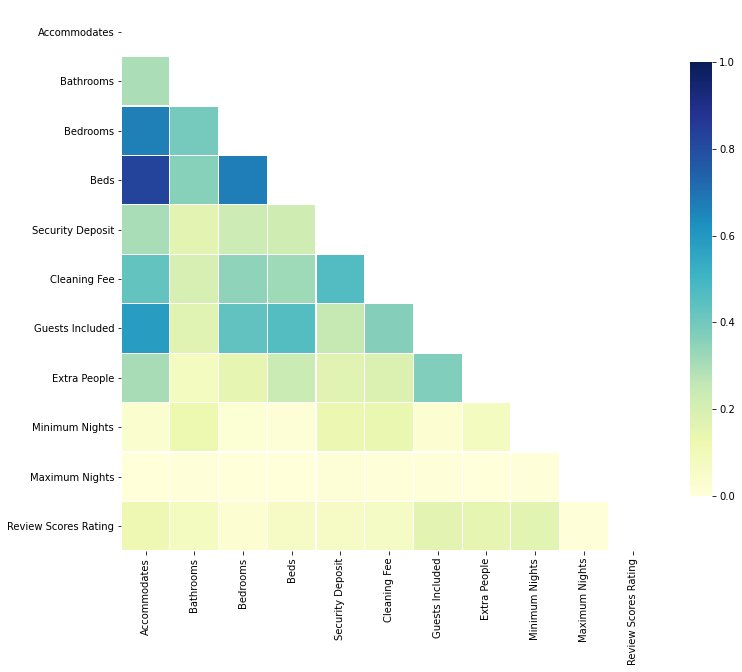

In [33]:
#Analizamos correlaciones entre variables
import seaborn as sns
import numpy as np
# Compute the correlation matrix
corr = np.abs(train_1.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [34]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8517 entries, 5410 to 2851
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood Group Cleansed  8517 non-null   object 
 1   Property Type                 8517 non-null   object 
 2   Room Type                     8517 non-null   object 
 3   Accommodates                  8517 non-null   int64  
 4   Bathrooms                     8517 non-null   float64
 5   Bedrooms                      8517 non-null   float64
 6   Beds                          8517 non-null   float64
 7   Bed Type                      8517 non-null   object 
 8   Price                         8517 non-null   float64
 9   Security Deposit              8517 non-null   float64
 10  Cleaning Fee                  8517 non-null   float64
 11  Guests Included               8517 non-null   int64  
 12  Extra People                  8517 non-null   int64  
 13  

## 2.3- División variables numéricas, categoricas y Target

### 2.3.1 -Datos TRAIN

Hasta este paso, se ha realizado la limpieza de variables y registros en el conjunto de datos. 

  * Numericas las estandarizamos y las categóricas las codificamos.
  * Despues concatenamos en un dataset definitivo
El próximo paso va a ser codificar las variables categóricas.

Creamos la variable target

In [35]:
Y_train = train_1['Price']
Y_train

5410      80.0
5896      25.0
7070      50.0
6202      78.0
5333      29.0
         ...  
9744      42.0
5100      34.0
3404      65.0
10377    179.0
2851      30.0
Name: Price, Length: 8517, dtype: float64

In [36]:
#Creamos 1 conjunto de datos para numéricas y otro para categóricas
cat_features = train_1.select_dtypes(include = ["object", "category"]).columns
cat_features
num_features = train_1.select_dtypes(include = ["int64", "float64"]).columns
num_train_1 = train_1.loc[:, num_features]

#### 2.3.1.1- Tratamiento variables categóricas

Codificamos variables categoricas mediante la media. Esta media será utilizada en los datos de test, ya que la codificación en test tendrá que realizarse con la media del train para no concurrir en data leakage.

In [37]:
# En train creamos un dict para usarlo después en test
# ESTO ES EN TRAIN.CSV!
import pandas as pd
mean_map = {}
cat_train_1 = pd.DataFrame()
for c in cat_features:
    mean = train_1.groupby(c)['Price'].mean()
    cat_train_1[c] = train_1[c].map(mean)    
    mean_map[c] = mean
# Luego, en test, categorizamos con los datos de train!
# ESTO ES EN TEST.CSV!
#for c in categorical:
 #   df_test[c] = df_test[c].map(mean_map[c])

 #Creamos dataset de categoricas

cat_train_1.head()

Neighbourhood Group Cleansed  ...  Cancellation Policy
5410                     67.683402  ...            54.430043
5896                     62.066465  ...            69.560890
7070                     67.683402  ...            59.881316
6202                     67.683402  ...            69.560890
5333                     67.683402  ...            54.430043

[5 rows x 5 columns]

#### 2.3.1.2- Tratamiento variables numéricas

Codificamos variables numéricas.

In [38]:
 # Estandarizamos los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaler = scaler.fit_transform(num_train_1)

num_train_1.iloc[:] = numerical_scaler
num_train_1.head(5)


Accommodates  Bathrooms  ...  Maximum Nights  Review Scores Rating
5410      0.459103  -0.423498  ...        0.010777              0.601902
5896     -0.554159   0.404730  ...        0.010777             -1.917794
7070      0.459103  -0.423498  ...       -0.090349              0.470668
6202     -0.554159  -0.423498  ...        0.010777             -0.159256
5333     -1.060790  -0.423498  ...        0.010777             -1.917794

[5 rows x 12 columns]

#### 2.3.1.3- Unión datos numéricos y categóricos *tratados*

Tenemos que concatenar las variables categóricas y numéricas para el precio

In [39]:
X_train = pd.concat([num_train_1, cat_train_1], axis=1, join='inner')
#Eliminamos la variable Precio del conjunto train
X_train.drop(['Price'],axis=1,inplace=True)
print(X_train.shape)

(8517, 16)


Vemos distribución de valores máximos, teniendo en cuenta las diferencias entre variables, sería conveniente escalar los datos.

In [40]:
X_train.max(axis=0)

Accommodates                      6.538675
Bathrooms                        11.171689
Bedrooms                         10.820503
Beds                              9.330490
Security Deposit                  7.910996
Cleaning Fee                     11.534666
Guests Included                  13.313675
Extra People                     27.769904
Minimum Nights                   10.967672
Maximum Nights                   90.361075
Review Scores Rating              0.706890
Neighbourhood Group Cleansed     86.523466
Property Type                   228.333333
Room Type                        84.282673
Bed Type                         61.911923
Cancellation Policy             163.000000
dtype: float64

FALTARIA VER SI APLICAMOS EL MINMAX SCALER

Aqui tenemos el dataset con las variables numéricas y categóricas estandarizadas y codificadas. A partir de aquí se puede meter ya en el modelo de regresión.

Los dataset van a ser: train: X_train, Y_train. 

Los de test: X_test, Y_test

### 2.3.2 Datos TEST

---



#### 2.3.2.1 Limpieza variables

In [41]:
#1-Realizamos la primera preselección de variables

test_1=test.loc[:,variables_selec]
test_1.shape

(2143, 32)

Seleccion variables 2 TEST

In [42]:
#La variable price tiene 7 registros sin informar. Los eliminamos
test_1.dropna(subset=['Price'],inplace=True)

# Las variables principales cómo bathrooms, bedrooms o beds tienen algun nulo. Teniendo en cuenta que los valores nulos 
#son tan pequeños. Vamos a eliminar esos registros.

test_1.dropna(subset=['Bathrooms'],inplace=True)
test_1.dropna(subset=['Bedrooms'],inplace=True)
test_1.dropna(subset=['Beds'],inplace=True)

#-Teniendo en cuenta el alto % de nulos que tienen se eliminan estas variables:
#-Square Feet, Weekly price y monthly price
    
test_1.drop(['Square Feet','Weekly Price','Monthly Price'],axis=1,inplace=True)    

#Respecto a las variables del dataset relativas a barrios, vamos a quedarnos con sólo 1 de ellas. En este caso con: **Neighbourhood Group Cleansed**
test_1.drop(['Neighbourhood','Neighbourhood Cleansed','Zipcode'],axis=1,inplace=True)  

#La variable amenities, es una variable que contiene texto y no se va a aplicar para este módulo la extraccón de conocimiento a través de ella por lo que la eliminamos
test_1.drop(['Amenities'],axis=1,inplace=True) 


test_1.drop(["Number of Reviews","Review Scores Accuracy", 'Review Scores Cleanliness','Review Scores Cleanliness',
                           'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value',
                           'Reviews per Month'],axis=1,inplace=True) 

#-En las variables Security Deposit y Cleaning Fee, vamos a tener en cuenta que el nulo equivale a 0, cómo que no tiene
#ni tarifa de limpieza ni deposito de seguridad.
#Aplicamos el fill rellenando con 0s.

test_1['Security Deposit'].fillna(0, inplace=True)
test_1['Cleaning Fee'].fillna(0, inplace=True)
test_1['Review Scores Rating'].fillna(0, inplace=True)

Y_test = test_1['Price']

test_1.shape


(2126, 17)

In [43]:
test_1.describe()


Accommodates    Bathrooms  ...  Maximum Nights  Review Scores Rating
count   2126.000000  2126.000000  ...     2126.000000           2126.000000
mean       2.997648     1.242004  ...      893.340075             73.056914
std        1.932142     0.610010  ...     2223.096608             37.746424
min        1.000000     0.000000  ...        1.000000              0.000000
25%        2.000000     1.000000  ...      365.000000             80.000000
50%        2.000000     1.000000  ...     1125.000000             91.000000
75%        4.000000     1.000000  ...     1125.000000             97.000000
max       16.000000     6.500000  ...    99999.000000            100.000000

[8 rows x 12 columns]

In [44]:
Y_test = test_1['Price']
Y_test.head()

4943     55.0
3854     30.0
8856     37.0
7800     30.0
5953    110.0
Name: Price, dtype: float64

#### 2.3.2.2 Tratamiento variables categoricas

In [45]:
cat_features_test = test_1.select_dtypes(include = ["object", "category"]).columns
cat_features_test
num_features = test_1.select_dtypes(include = ["int64", "float64"]).columns
num_test_1 = test_1.loc[:, num_features]

In [46]:
#Codificamos con las medias de train almacenadas en mean_map
mean_map
cat_test_1=pd.DataFrame()
for c in cat_features_test:
   cat_test_1[c] = test_1[c].map(mean_map[c])
cat_test_1.head()

Neighbourhood Group Cleansed  ...  Cancellation Policy
4943                     67.683402  ...            54.430043
3854                     67.683402  ...            69.560890
8856                     44.038023  ...            69.560890
7800                     67.683402  ...            69.560890
5953                     86.523466  ...            69.560890

[5 rows x 5 columns]

#### 2.3.2.3 Tratamiento variables numéricas

In [47]:
num_features_test = test_1.select_dtypes(include = ["int64", "float64"]).columns
num_test_1 = test_1.loc[:, num_features_test]
#Eliminamos la variable precio
num_test_1.drop(['Price'],axis=1,inplace=True) 
num_test_1.head()

Accommodates  Bathrooms  ...  Maximum Nights  Review Scores Rating
4943             2        1.0  ...            1125                  95.0
3854             2        4.5  ...            1125                  98.0
8856             2        1.0  ...              90                  90.0
7800             2        1.0  ...            1125                 100.0
5953             2        1.0  ...            1125                 100.0

[5 rows x 11 columns]

In [48]:
 # Estandarizamos los valores
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_scaler_test = scaler.fit_transform(num_test_1)

num_test_1.iloc[:] = numerical_scaler_test
num_test_1.head(5)

Accommodates  Bathrooms  ...  Maximum Nights  Review Scores Rating
4943     -0.516465  -0.396814  ...        0.104230              0.581466
3854     -0.516465   5.342144  ...        0.104230              0.660962
8856     -0.516465  -0.396814  ...       -0.361446              0.448972
7800     -0.516465  -0.396814  ...        0.104230              0.713960
5953     -0.516465  -0.396814  ...        0.104230              0.713960

[5 rows x 11 columns]

#### 2.3.2.4 Unión datos numéricos y categóricos

In [49]:
X_test = pd.concat([num_test_1, cat_test_1], axis=1, join='inner')
print(X_test.shape)

(2126, 16)


In [50]:
Y_test.shape

(2126,)

# 3.-Preparación datos para el modelo. Escalado de los datos

In [51]:
#La variable y_class la hemos creado al comienzo del notebook.
#***Esta variable la usaremos para el modelo de clasificación
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

Using TensorFlow backend.


In [52]:
 # Normalizamos datos y etiquetas (en esta ocasión las etiquetas son los precios 
# y vamos a normalizarlos también entre 0 y 1)
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm = min_max_scaler.fit_transform(X_train)
#Y_train_norm = (Y_train - Y_train.min()) / (Y_train.max() - Y_train.min()) # esto es lo que hace "under the hood" el min_max_scaler
X_test_norm = min_max_scaler.fit_transform(X_test)

In [53]:
X_train.shape

(8517, 16)

In [54]:
maxPrice = Y_train.max()
Y_train_max = Y_train / maxPrice
Y_test_max= Y_test / maxPrice
maxPrice
Y_train_max
Y_test_max

4943    0.073333
3854    0.040000
8856    0.049333
7800    0.040000
5953    0.146667
          ...   
3836    0.049333
9349    0.193333
7498    0.020000
4352    0.026667
8324    0.133333
Name: Price, Length: 2126, dtype: float64

Dividimos los datos de train en train y validacion, para ver los resultados del modelo. Los de train y test ya se han realizado desde 1 principio

In [55]:
# convertimos las etiquetas a onehot
from keras.utils import to_categorical
y_class_onehot = to_categorical(y_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train_def, X_val_def, Y_train_def, Y_val_def = train_test_split(X_train_norm, Y_train_max, test_size=0.1, random_state=42) 

# 4.-Creación de modelos con datos tabulares del fichero airbnb.csv



## 4.1.- Modelo de regresión

Vamos a implementar un modelo de redes neuronales, perceptron multicapa, para predicción del valor del precio. Para ello, la arquitectura va a ser sencilla y va a tener 3 capas de 64,32 y 1 de salida.

La función de perdida utilizada es: mean_Absolute_Percentage_Error y el optimizador adam con un learning rate de 0.001.

Teniendo esta configuración cómo base hemos realizado diferentes pruebas para ver el performance del modelo.

In [56]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras import layers


#model = Sequential()
#model.add(Dense(32, input_shape=(X_train_def.shape[1],), activation='relu'))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona
	
#Creamos el modelo perceptron multicapa (2 capas)
model = Sequential()
model.add(Dense(64, input_shape=(X_train_def.shape[1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1,activation="linear"))

#Entrenamos nuestro modelo. Los parametros son:
  #Our model is initialized with the Adam optimizer. Notice that we’re using mean absolute percentage error as our loss function, 
  #indicating that we seek to minimize the mean percentage difference between the predicted price and the actual price.
opt = Adam(lr=0.005, decay=1e-3 / 200)
#opt = Adam(learning_rate=0.01)

model.compile(loss='mean_absolute_percentage_error', optimizer= opt)

model.fit(X_train_def, Y_train_def,
          validation_data=(X_val_def, Y_val_def),
          epochs=50,
          batch_size=8)

Train on 7665 samples, validate on 852 samples
Epoch 1/50
7665/7665 [==============================] - 4s 534us/step - loss: 33.3308 - val_loss: 26.1430
Epoch 2/50
7665/7665 [==============================] - 2s 310us/step - loss: 27.4836 - val_loss: 27.7244
Epoch 3/50
7665/7665 [==============================] - 2s 305us/step - loss: 27.5286 - val_loss: 25.7554
Epoch 4/50
7665/7665 [==============================] - 2s 314us/step - loss: 27.7506 - val_loss: 26.1663
Epoch 5/50
7665/7665 [==============================] - 2s 310us/step - loss: 27.0330 - val_loss: 30.0693
Epoch 6/50
7665/7665 [==============================] - 2s 307us/step - loss: 26.8595 - val_loss: 26.8007
Epoch 7/50
7665/7665 [==============================] - 2s 306us/step - loss: 26.5580 - val_loss: 27.2041
Epoch 8/50
7665/7665 [==============================] - 2s 307us/step - loss: 26.5859 - val_loss: 27.0891
Epoch 9/50
7665/7665 [==============================] - 2s 306us/step - loss: 26.4032 - val_loss: 25.9786

Una vez hemos entrenado el modelo, vamos a evaluarlo y summarizar resultados

In [57]:
import locale

# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test_norm)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - Y_test_max
percentDiff = (diff / Y_test_max) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(Y_train.mean(), grouping=True),
	locale.currency(Y_train.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $61.67, std house price: $51.28
[INFO] mean: 31.26%, std: 28.86%


### 4.1.1- Conclusiones resultados

* Después de realizar varias pruebas variando el número de épocas, learning rate y la arquitectura de la red neuronal. Los resultados son bastante similares entre si. En todos los casos a partir del número de epoca 30 aproximadamente ya no aprende y se queda estable. En el caso de aumento o disminución de learning rate, no se consiguen resultadoso mejores tampoco. En este caso el resultado en train y validación ronda el 25% de error y en el de Test el 34%. 
Para intentar mejorar los resultados, deberíamos de analizar cómo se distribuye el error y correlacionarlo con el precio(mayor precio mayor error etc.) y también deberíamos de realizar más iteraciones en la generación y tuneado del modelo, creando nuevas variables que apriori han sido desechadas como las de texto u reviews que quizás nos ayuden a predecir mejor. También hay que tener en cuenta la varianza del precio ya que hay casas con precios altos que no se eliminan y podrían eliminarse para así introducir menos ruido.

## 4.2.- Modelo de clasificación

In [58]:
#Usamos los mismos datos que en la regresión, sólo modificamos la variable precio, que en lugar de numérica tiene que ser categórica.

In [59]:
#Vamos a categorizar las variables

y_train_class = []
for x in Y_train:
    # barato
    if x <= 50:
        y_train_class.append(0)
    elif x <=150:
        y_train_class.append(1)
    else:
        y_train_class.append(2)
y_train_class = to_categorical(y_train_class)

In [60]:
y_test_class = []
for x in Y_test:
    # barato
    if x <= 50:
        y_test_class.append(0)
    elif x <=150:
        y_test_class.append(1)
    else:
        y_test_class.append(2)

y_test_class = to_categorical(y_test_class)  

MODELO DE CLASIFICACION


In [61]:

X_train_def_class, X_val_def_class, Y_train_def_class, Y_val_def_class = train_test_split(X_train_norm, y_train_class, test_size=0.1, random_state=42) 


La arquitectura de red que hemos creado es practicamente la misma que la de la regresión, exceptuando la capa de salida que serían 3 neuronas para 3 clases y la función de activación softmax para clasificación en lugar de la lineal

In [62]:
from keras.layers import Dense, Dropout
#Creamos el modelo perceptron multicapa (2 capas)
model = Sequential()
model.add(Dense(64, input_shape=(X_train_def_class.shape[1],), activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(3,activation="softmax"))

opt = Adam(lr=0.001, decay=1e-3 / 200)
#opt = Adam(learning_rate=0.01)

model.compile(loss='categorical_crossentropy', optimizer= 'adam',metrics=['accuracy'])

model.fit(X_train_def_class, Y_train_def_class,
          validation_data=(X_val_def_class, Y_val_def_class),
          epochs=50,
          batch_size=8)

Train on 7665 samples, validate on 852 samples
Epoch 1/50
7665/7665 [==============================] - 3s 406us/step - loss: 0.5802 - accuracy: 0.7760 - val_loss: 0.4679 - val_accuracy: 0.8110
Epoch 2/50
7665/7665 [==============================] - 3s 385us/step - loss: 0.4861 - accuracy: 0.8016 - val_loss: 0.4530 - val_accuracy: 0.8146
Epoch 3/50
7665/7665 [==============================] - 3s 385us/step - loss: 0.4709 - accuracy: 0.8097 - val_loss: 0.4442 - val_accuracy: 0.8228
Epoch 4/50
7665/7665 [==============================] - 3s 382us/step - loss: 0.4634 - accuracy: 0.8080 - val_loss: 0.4394 - val_accuracy: 0.8228
Epoch 5/50
7665/7665 [==============================] - 3s 390us/step - loss: 0.4544 - accuracy: 0.8120 - val_loss: 0.4376 - val_accuracy: 0.8251
Epoch 6/50
7665/7665 [==============================] - 3s 381us/step - loss: 0.4500 - accuracy: 0.8130 - val_loss: 0.4607 - val_accuracy: 0.8204
Epoch 7/50
7665/7665 [==============================] - 3s 383us/step - loss:

In [63]:
loss, acc = model.evaluate(X_test_norm, y_test_class)
print(f'Loss={loss}, Acc={acc}')

2126/2126 [==============================] - 0s 47us/step
Loss=0.4272217750829677, Acc=0.8222013115882874


### 4.2.1- Conclusiones resultados

El accuracy obtenido es de 0.8 lo cual no está mal. Se han realizado diferentes pruebas, partiendo de la arquitectura base, hemos ido modificando los learning rate y batch size y hemos visto cómo los resultados en train y validación eran ligeramente  superiores a los de test, sobre el 83% en train y 70% en validación. Hemos añadido una capa de dropout después de cada una de las capas y ver si evitabamos caer en overfitting y los resultados han sido mejores, obteniendo un 81,6% de accuracy. También hemos subido el batch size a 16 pero se empeoraba un poco el resultado.

# 5.- Creación de modelos con datos de imagenes. Redes Convolucionales.

* En primer lugar, lo que hay que crear es un modelo para poder extraer las características de nuestras imagenes. Para ello:
* Se preentrenan 1 arquitectura con imagenet y se crea un modelo
* Usamos este modelo base(transfer learning) y le agregamos unas capas de clasificación y regresión.
* También se puede extraer un dataset con las caracteristicas de las imagenes y realizar la clasificación o regresión con otro algoritmo. Esta parte se va a tratar en el punto 6 en el que se juntará con el dataset del fichero csv


In [65]:
#Las imagenes cargadas son las siguientes:
loaded_images.shape

(14001, 224, 224, 3)

Para poder extraer las características del modelo, lo que se puede realizar es:
*    Crear un modelo con un entrenamiento base. 
      Usaremos el imagenet con la arquitectura vgg16 para poder realizar un transfer learning. A partir de ese conocimiento realizaremos los modelos de clasificación y regresión
*    Podemos también aplicar el fine tuning para probar entrenando las ultimas capas del vgg16

*    Aplicar el modelo para la extracción de las características sobre las imagenes cargadas

In [66]:
# We first load the necessary libraries, the dataset and reshape its dimensons to the minimum allowed by the VGG16 --> (48,48,3)
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

Lo primero que tenemos que hacer es un resize del dataset de imagenes. Vamos a utilizar la arquitectura vgg16 con los pesos del dataset imagenet precargados. Esta arquitectura requiere de un formato de datos de (48,48,3) y nuestras imagenes son de (224,224,3)

In [68]:
#Vamos a quedarnos con las fotos que estan bien cargadas solo

loaded_images_ok = loaded_images[was_loaded == 1]

In [69]:
loaded_images_ok.shape

(11271, 224, 224, 3)

In [70]:
input_shape = (48,48,3)

In [73]:
#Hacemos un resize de todo el dataset
loaded_images_resized = []
for img in loaded_images_ok:
  loaded_images_resized.append(np.resize(img, input_shape) / 255)
loaded_images_resized = np.array(loaded_images_resized)
print(loaded_images_resized.shape)

(11271, 48, 48, 3)


Observamos si hay algun nan

In [74]:
array_sum = np.sum(loaded_images_resized)
array_has_nan = np.isnan(array_sum)

print(array_has_nan)

False


In [77]:
#La variable que podemos utilizar es la siguiente para precio:
precios_imagenes = data_with_imgs['Price']
precios_imagenes

0        349.0
1        165.0
2        129.0
3         90.0
4         89.0
         ...  
11266     79.0
11267     31.0
11268     20.0
11269     55.0
11270     80.0
Name: Price, Length: 11271, dtype: float64

In [78]:
loaded_images_resized.shape

(11271, 48, 48, 3)

In [79]:
precios_imagenes.shape

(11271,)

In [80]:
#Vamos a escalar los precios correspondientes de cada piso

maxPrice = Y_train.max()
Y_train_max = Y_train / maxPrice
Y_test_max= Y_test / maxPrice

## 5.1 División Train y Test

In [81]:
#X_train_images, X_test_images = train_test_split(loaded_images, test_size=0.2, shuffle=True, random_state=0)


X_train_resized, X_test_resized, y_train_resized, Y_test_resized = train_test_split(loaded_images_resized, precios_imagenes, test_size=0.2, random_state=42)

maxPrice = y_train_resized.max()
Y_train_resized_max = y_train_resized / maxPrice
Y_test_resized_max= Y_test_resized / maxPrice

#Vamos a coger las imagenes y dividirlas en train  y test según cómo lo hemos dividido más arriba, para que nos cuadre con las del precio:


In [115]:
array_sum = np.sum(X_train_resized)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

## 5.2 Creación modelo base para Transfer Learning

Vamos a crear el modelo base, que se a servir para realizar el transfer learning

In [82]:
import tensorflow as tf
from keras import callbacks
from keras import optimizers
from keras.engine import Model
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.applications import VGG16
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np


In [83]:
# construimos el modelo base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
base_model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
______________________________________________________________

Ya que vamos a utilizar las capas del modelo base con los pesos tal cual vienen de la base de datos imagenet, es decir, no vamos a reentrenarlos con nuestros datos, vamos a congelar todas las capas. De esta manera obtenemos los resultados pero sin tocar el modelo.

In [84]:
# congelamos todas las capas de nuestro base_model para que no se entrenen
# queremos que nuestro feature extractor siga igual que antes => transfer learning
for layer in base_model.layers:
    layer.trainable = False
    print('Capa ' + layer.name + ' congelada')

Capa input_1 congelada
Capa block1_conv1 congelada
Capa block1_conv2 congelada
Capa block1_pool congelada
Capa block2_conv1 congelada
Capa block2_conv2 congelada
Capa block2_pool congelada
Capa block3_conv1 congelada
Capa block3_conv2 congelada
Capa block3_conv3 congelada
Capa block3_pool congelada
Capa block4_conv1 congelada
Capa block4_conv2 congelada
Capa block4_conv3 congelada
Capa block4_pool congelada
Capa block5_conv1 congelada
Capa block5_conv2 congelada
Capa block5_conv3 congelada
Capa block5_pool congelada


## 5.3 Modelo Regresión Transfer Learning

Partiendo cómo base el modelo, agregamos las capas correspondientes a la red neuronal para convertirlo en un modelo de regresión para nuestros datos

In [85]:
# Cogemos la última capa del model y le añadimos nuestro modelo de regresión

last = base_model.layers[-1].output
x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(1, activation='linear',name='predicciones')(x) # sin funcion de act y solo 1 neurona

model = Model(base_model.input, x)
model.compile(optimizer=Adam(lr=0.001),loss='mean_absolute_percentage_error')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

Podemos ver la arquitectura completa de la red, las 3 ultimas capas son las que acabamos de agregar para predecir mediante regresión. Esos son los únicos parametros o neuronas que se vana reentrenar, en este caso, 514.001

In [111]:
#Dividimos los datos de train en train y validación

X_train_resized_mod, X_val_resized_mod, y_train_resized_mod, y_val_resized_mod = train_test_split(X_train_resized, Y_train_resized_max, test_size=0.1, random_state=42)

In [112]:
Y_train_resized_max.head()

8478     0.031765
6347     0.382353
7376     0.088235
11205    0.029412
8903     0.070588
Name: Price, dtype: float64

In [113]:
X_train_resized_mod.shape

(8114, 48, 48, 3)

### 5.3.1 Entrenamiento modelo

In [91]:
# comenzamos con el entrenamiento
epochs = 15
batch_size = 64


# como entrenariamos normalmente
model.fit(X_train_resized_mod,y_train_resized_mod,
          #X_train_resized_mod, y_train_resized_mod,
          batch_size=batch_size,
          validation_data=(X_val_resized_mod, y_val_resized_mod),
                           #X_test_resized,Y_test_resized),
          epochs=epochs)


Train on 8114 samples, validate on 902 samples
Epoch 1/15
8114/8114 [==============================] - 7s 881us/step - loss: nan - val_loss: 91.6139
Epoch 2/15
8114/8114 [==============================] - 2s 255us/step - loss: nan - val_loss: 53.5094
Epoch 3/15
8114/8114 [==============================] - 2s 254us/step - loss: nan - val_loss: 50.5640
Epoch 4/15
8114/8114 [==============================] - 2s 254us/step - loss: nan - val_loss: 49.5944
Epoch 5/15
8114/8114 [==============================] - 2s 254us/step - loss: nan - val_loss: 49.1532
Epoch 6/15
8114/8114 [==============================] - 2s 255us/step - loss: nan - val_loss: 50.1724
Epoch 7/15
8114/8114 [==============================] - 2s 256us/step - loss: nan - val_loss: 49.1713
Epoch 8/15
8114/8114 [==============================] - 2s 256us/step - loss: nan - val_loss: 48.7414
Epoch 9/15
8114/8114 [==============================] - 2s 256us/step - loss: nan - val_loss: 48.9156
Epoch 10/15
8114/8114 [============

In [127]:
#Evaluamos el modelo con datos de test

loss = model.evaluate(X_test_resized, Y_test_resized)
print(f'Loss={loss}')

2255/2255 [==============================] - 1s 285us/step
Loss=99.91353818973786


### 5.3.2 Conclusiones resultados

## 5.4 Modelo clasificación Transfer Learning

In [128]:
# cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output

x = Flatten()(last)
x = Dense(1000, activation='relu', name='fc1')(x)
x = Dropout(0.3)(x)
x = Dense(3, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x)

model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0   

In [130]:
#Vamos a dividir datos de train y test segun la variable categorica de precio
y_train_resized, Y_test_resized

(8478      27.0
 6347     325.0
 7376      75.0
 11205     25.0
 8903      60.0
          ...  
 5734      40.0
 5191      25.0
 5390      30.0
 860       52.0
 7270     139.0
 Name: Price, Length: 9016, dtype: float64, 9944     80.0
 2517     77.0
 3887     80.0
 4981     74.0
 6338     20.0
          ... 
 4598     19.0
 6706     23.0
 5632     61.0
 8448     95.0
 10687    40.0
 Name: Price, Length: 2255, dtype: float64)

In [132]:
y_train_resized_class = []
for x in y_train_resized:
    # barato
    if x <= 50:
        y_train_resized_class.append(0)
    elif x <=150:
        y_train_resized_class.append(1)
    else:
        y_train_resized_class.append(2)

y_train_resized_class = to_categorical(y_train_resized_class)

y_test_resized_class = []
for x in Y_test_resized:
    # barato
    if x <= 50:
        y_test_resized_class.append(0)
    elif x <=150:
        y_test_resized_class.append(1)
    else:
        y_test_resized_class.append(2)

y_test_resized_class = to_categorical(y_test_resized_class)


### 5.4.1 Entrenamiento modelo

In [135]:
# comenzamos con el entrenamiento
epochs = 25
batch_size = 64

# como entrenariamos normalmente
model.fit(X_train_resized,y_train_resized_class,
          batch_size=batch_size,
          validation_data=(#X_val_resized_mod, y_val_resized_mod
                           X_test_resized,y_test_resized_class),
          epochs=epochs)


Train on 9016 samples, validate on 2255 samples
Epoch 1/25
9016/9016 [==============================] - 3s 290us/step - loss: 0.8355 - accuracy: 0.5618 - val_loss: 0.8415 - val_accuracy: 0.5428
Epoch 2/25
9016/9016 [==============================] - 3s 287us/step - loss: 0.8341 - accuracy: 0.5609 - val_loss: 0.8407 - val_accuracy: 0.5468
Epoch 3/25
9016/9016 [==============================] - 3s 286us/step - loss: 0.8307 - accuracy: 0.5670 - val_loss: 0.8420 - val_accuracy: 0.5481
Epoch 4/25
9016/9016 [==============================] - 3s 285us/step - loss: 0.8301 - accuracy: 0.5723 - val_loss: 0.8431 - val_accuracy: 0.5521
Epoch 5/25
9016/9016 [==============================] - 3s 287us/step - loss: 0.8302 - accuracy: 0.5693 - val_loss: 0.8392 - val_accuracy: 0.5432
Epoch 6/25
9016/9016 [==============================] - 3s 290us/step - loss: 0.8289 - accuracy: 0.5704 - val_loss: 0.8441 - val_accuracy: 0.5384
Epoch 7/25
9016/9016 [==============================] - 3s 288us/step - loss

In [136]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_resized, y_test_resized_class)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2255/2255 [==============================] - 1s 298us/step
Test loss: 0.8649511650237699
Test accuracy: 0.5503326058387756


### 5.4.2 Conclusiones resultados

Al igual que en el modelo de regresión, hemos creado el modelo de clasificación para clasificar el precio de cada piso, en función a los datos de la imagen. En primer lugar, las imagenes de los pisos no son estandares, cada piso tiene una imagen de una estancia diferente y no representa la suficiente información cómo para poder predecir un piso. El mejor resultado obtenido en las diferentes pruebas realizadas es de 55% de acierto. Evidentemente no es un buen resultado, pero con las imagenes que tenemos y tal y cómo hemos sacado el modelo, mediante transfer learning, algo es algo.

El siguiente objetivo en la práctica es combinar tanto estos datos de imagenes como los datos del csv para ver si podemos obtener una predicción/clasificación del precio mejor que hasta ahora de manera individual


# 6.- Creación de modelos con todos los tipos de datos: tabulares(numéricos) e imagenes

## 6.1 Extracción de dataset de características de imagenes

En primer lugar se va a extraer 1 dataset de la red convolucional, con las características por cada piso. De esta manera obtendremos 1 dataset con cada piso y 512 columnas. Esto lo uniremos al dataset numérico y desarrollaremos los modelos de regresión y clasificación

Agregando una capa globalaveragepooling, podremos obtener las características que el modelo VGG16 de imagenet extrae de nuestros datos de imagenes. De esta manera extraemos el dataset y lo combinamos con las numéricas del csv

In [137]:
# creamos un modelo para extraer el vector de características de nuestras imágenes
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model_base = VGG16(weights='imagenet', include_top=False)

# creamos un modelo añadiéndole la capa GlobalAveragePooling
x = model_base.output
gap = GlobalAveragePooling2D()(x)
model = Model(inputs=model_base.input, outputs=gap)

model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [138]:
#Nuestro dataset de imagenes es el siguiente:

loaded_images_resized.shape

(11271, 48, 48, 3)

A comentar que introducimos manualmente 512 porque es el número de características que el modelo va a extraer. Si nos fijamos en la última capa, la salida de la capa globar average pooling tiene ese número

In [140]:
from tqdm import tqdm  # para  mostrar el progreso
# vamos a procesarlas y a extraer el vector de 512 características
n_images=11271
images_feat = np.zeros((n_images, 512))

for i in tqdm(range(loaded_images_resized.shape[0])):
    img = loaded_images_resized[i]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    features = model.predict(x)
    images_feat[i] = features[0]


100%|██████████| 11271/11271 [00:38<00:00, 293.52it/s]


In [144]:
images_feat.shape

(11271, 512)

Ya tenemos las 11271 imagenes con las 512 características.

## 6.2 Preparación y combinación datasets para modelo

Necesitamos antes de unir ambos dataset, quedarnos con los mismos pisos tanto en imagenes como en el dataset data_with_imgs.

In [153]:
data_total = pd.DataFrame(np.concatenate((data_with_imgs, images_feat), axis=1)).iloc[:,90:]
print(data_total.shape)

(11271, 512)


Tenemos que unir los datos numéricos y de imagenes y creamos el modelo de regresión y clasificación.

Concatenamos ambos datasets, el dataset tabular sera X_train e Y_test

In [154]:
X_train_all=pd.merge(X_train, data_total,left_index=True, right_index=True)
X_test_all=pd.merge(X_test, data_total, left_index=True, right_index=True)

In [155]:
X_train_all.shape

(8517, 528)

In [156]:
X_test_all.shape

(2126, 528)

In [157]:
X_train_all.head()

Accommodates  Bathrooms  Bedrooms      Beds  ...  598  599      600  601
5410      0.459103  -0.423498  -0.34598  0.699255  ...    0    0   3.9559    0
5896     -0.554159   0.404730  -0.34598 -0.628628  ...    0    0  3.31414    0
7070      0.459103  -0.423498  -0.34598 -0.628628  ...    0    0  3.84297    0
6202     -0.554159  -0.423498  -1.58670 -0.628628  ...    0    0  3.80428    0
5333     -1.060790  -0.423498  -0.34598 -0.628628  ...    0    0  3.83148    0

[5 rows x 528 columns]

Ya tenemos el dataset disponible, nos queda lanzar los modelos de regresión y clasificación y comparar resultados

In [ ]:
#Los datasets del modelo son: X_train_norm_all, X_test_norm_all, Y_train,Y_test

## 6.3 Modelo clasificación

### 6.3.1 Escalamos datos

In [158]:
# Vamos a normalizar entre 0 y 1 los datos de X
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_norm_all = min_max_scaler.fit_transform(X_train_all)
X_test_norm_all = min_max_scaler.fit_transform(X_test_all)
# en este caso no es necesario normalizar las etiquetas, ya que son valores de 0 a N_Clases. En regresión si los normalizaremos

In [175]:
#Vamos a categorizar las variables

y_train_class = []
for x in Y_train:
    # barato
    if x <= 50:
        y_train_class.append(0)
    elif x <=150:
        y_train_class.append(1)
    else:
        y_train_class.append(2)
y_train_class = to_categorical(y_train_class)

In [176]:
y_test_class = []
for x in Y_test:
    # barato
    if x <= 50:
        y_test_class.append(0)
    elif x <=150:
        y_test_class.append(1)
    else:
        y_test_class.append(2)

y_test_class = to_categorical(y_test_class)  

In [177]:
y_train_class

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [159]:
X_train_norm_all.shape

(8517, 528)

### 6.3.2 Convertimos a categorica la variable precio

In [160]:
#Como es clasificación no hace falta normalizar la variable target
#Tenemos que pasar variable categorica

In [189]:
 # convertimos las etiquetas a onehot
from keras.utils import to_categorical
#y_class_onehot = to_categorical(y_train_class)

# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train_norm_all_mod, X_val, y_train_norm_all_mod, y_val = train_test_split(X_train_norm_all, y_train_class, test_size=0.1, random_state=42)


In [190]:
X_train_norm_all_mod.shape

(7665, 528)

In [191]:
y_train_norm_all_mod.shape

(7665, 3)

### 6.3.3 Entrenamiento Modelo

In [197]:
# Creamos un modelo para hacer primero clasificación con y_class
from keras.models import Sequential
from keras.layers import Dense, Dropout


model = Sequential()
model.add(Dense(128, input_shape=(X_train_norm_all_mod.shape[1],), activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(3, activation='softmax'))

# sparse_categorical_crossentropy es exactamente igual que categorical_crossentropy,
# solo que admite enteros en vez de onehot a la entrada
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train_norm_all_mod, y_train_norm_all_mod,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

loss, acc = model.evaluate(X_test_norm_all, y_test_class)
print(f'Loss={loss}, Acc={acc}')

Train on 7665 samples, validate on 852 samples
Epoch 1/50
7665/7665 [==============================] - 3s 450us/step - loss: 0.5449 - accuracy: 0.7850 - val_loss: 0.4668 - val_accuracy: 0.8146
Epoch 2/50
7665/7665 [==============================] - 3s 422us/step - loss: 0.4824 - accuracy: 0.8038 - val_loss: 0.4528 - val_accuracy: 0.8169
Epoch 3/50
7665/7665 [==============================] - 3s 391us/step - loss: 0.4669 - accuracy: 0.8076 - val_loss: 0.4476 - val_accuracy: 0.8216
Epoch 4/50
7665/7665 [==============================] - 3s 393us/step - loss: 0.4612 - accuracy: 0.8064 - val_loss: 0.4491 - val_accuracy: 0.8298
Epoch 5/50
7665/7665 [==============================] - 3s 395us/step - loss: 0.4606 - accuracy: 0.8097 - val_loss: 0.4562 - val_accuracy: 0.8192
Epoch 6/50
7665/7665 [==============================] - 3s 395us/step - loss: 0.4569 - accuracy: 0.8125 - val_loss: 0.4387 - val_accuracy: 0.8298
Epoch 7/50
7665/7665 [==============================] - 3s 396us/step - loss:

Resultados obtenidos en test:

In [198]:
# comprobamos el accuracy y el loss en el test set
scores = model.evaluate(X_test_norm_all, y_test_class)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

2126/2126 [==============================] - 0s 60us/step
Test loss: 0.417877272318134
Test accuracy: 0.835841953754425


### 6.3.4 Conclusiones resultados

Los resultados obtenidos en cuanto accuracy son muy similares al modelo de clasificación realizado sólo con datos tabulares. Esto nos dice un poco que el hecho de incluir características de imagenes tal cual las hemos escogido no aporta mucho valor al modelo. En la linea de lo que comentabamos en el apartado anterior, las imagenes deberían dar información mucho más homogenea de cada piso para poder representar las características que induzcan a calcular o estimar un precio.

## 6.4 Modelo Regresión

### 6.4.1 Escalado de variables

In [199]:
maxPrice = Y_train.max()
Y_train_max = Y_train / maxPrice
Y_test_max= Y_test / maxPrice
maxPrice

750.0

In [200]:
Y_train_max

5410     0.106667
5896     0.033333
7070     0.066667
6202     0.104000
5333     0.038667
           ...   
9744     0.056000
5100     0.045333
3404     0.086667
10377    0.238667
2851     0.040000
Name: Price, Length: 8517, dtype: float64

In [201]:
X_train_norm_all.shape

(8517, 528)

In [202]:
# convertimos las etiquetas a onehot
# Vamos a dividir en train y en test
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(data_norm, y_class_onehot, test_size=0.2, random_state=42)
X_train_norm_all_mod, X_val, y_train_norm_all_mod, y_val = train_test_split(X_train_norm_all, Y_train_max, test_size=0.1, random_state=42)

### 6.4.2 Entrenamiento modelo

In [203]:
# Creamos un modelo para hacer regresión con y_reg
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras import layers


#model = Sequential()
#model.add(Dense(64, input_shape=(X_train_def.shape[1],), activation='relu'))
#model.add(Dense(32, activation='relu'))
#model.add(Dense(1, activation='linear'))  # sin funcion de act y solo 1 neurona
	
#Creamos el modelo perceptron multicapa (2 capas)
model = Sequential()
model.add(Dense(128, input_shape=(X_train_norm_all_mod.shape[1],), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1,activation="linear"))

#Entrenamos nuestro modelo. Los parametros son:
  #Our model is initialized with the Adam optimizer. Notice that we’re using mean absolute percentage error as our loss function, 
  #indicating that we seek to minimize the mean percentage difference between the predicted price and the actual price.
opt = Adam(lr=0.005, decay=1e-3 / 200)
#opt = Adam(learning_rate=0.01)

model.compile(loss='mean_absolute_percentage_error', optimizer= opt)

model.fit(X_train_norm_all_mod, y_train_norm_all_mod,
          validation_data=(X_val, y_val),
          epochs=50,
          batch_size=8)

Train on 7665 samples, validate on 852 samples
Epoch 1/50
7665/7665 [==============================] - 3s 369us/step - loss: 33.3209 - val_loss: 27.3554
Epoch 2/50
7665/7665 [==============================] - 3s 357us/step - loss: 29.2466 - val_loss: 29.3541
Epoch 3/50
7665/7665 [==============================] - 3s 341us/step - loss: 28.4142 - val_loss: 33.9328
Epoch 4/50
7665/7665 [==============================] - 3s 345us/step - loss: 28.3369 - val_loss: 27.3798
Epoch 5/50
7665/7665 [==============================] - 3s 346us/step - loss: 27.1684 - val_loss: 26.7814
Epoch 6/50
7665/7665 [==============================] - 3s 340us/step - loss: 27.6423 - val_loss: 27.0011
Epoch 7/50
7665/7665 [==============================] - 3s 347us/step - loss: 27.1815 - val_loss: 29.0039
Epoch 8/50
7665/7665 [==============================] - 3s 343us/step - loss: 27.2521 - val_loss: 25.8216
Epoch 9/50
7665/7665 [==============================] - 3s 347us/step - loss: 26.9657 - val_loss: 27.1975

#Resultados obtenidos

In [204]:
import locale

# make predictions on the testing data
print("[INFO] predicting house prices...")
preds = model.predict(X_test_norm_all)
# compute the difference between the *predicted* house prices and the
# *actual* house prices, then compute the percentage difference and
# the absolute percentage difference
diff = preds.flatten() - Y_test_max
percentDiff = (diff / Y_test_max) * 100
absPercentDiff = np.abs(percentDiff)
# compute the mean and standard deviation of the absolute percentage
# difference
mean = np.mean(absPercentDiff)
std = np.std(absPercentDiff)
# finally, show some statistics on our model
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")
print("[INFO] avg. house price: {}, std house price: {}".format(
	locale.currency(Y_train.mean(), grouping=True),
	locale.currency(Y_train.std(), grouping=True)))
print("[INFO] mean: {:.2f}%, std: {:.2f}%".format(mean, std))

[INFO] predicting house prices...
[INFO] avg. house price: $61.67, std house price: $51.28
[INFO] mean: 28.86%, std: 24.63%


### 6.4.3 Conclusiones resultados

Las conclusiones son muy similares a las que hemos comentado para el modelo de clasificación. Con estos datos el error no parece mejorar a pesar de realizar diferentes preubas en el modelo. Para continuar mejorandolo, deberíamos de trabajar más los datos, las variables, podríamos incluso acotar el rango de precios a predecir y en la parte de imagenes se necesitaría una bbdd de imagenes de cada piso que sea más representativa y nos permita estimar un valor del precio aportandonos  más información. O al menos, disponer de los mismos tipos de foto de cada apartamento (mismas estancias, tipos de foto etc.)